In [1]:
# Erasmus+ ICCT project (2018-1-SI01-KA203-047081)

# Toggle cell visibility

from IPython.display import HTML
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.input').hide()
    } else {
        $('div.input').show()
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
Toggle cell visibility <a href="javascript:code_toggle()">here</a>.''')
display(tag)

In [2]:
%matplotlib notebook
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import ipywidgets as widgets

## Linearizzazione - Pendolo

Quando si ha a che fare con modelli di sistemi, la linearizzazione è un processo di modellazione che permette di approssimare un sistema non lineare con un'equazione differenziale lineare nelle vicinanze di un punto operativo (tipicamente un punto di equilibrio). In questo notebook questo processo verrà dimostrato utilizzando un semplice pendolo. La forza che causa il movimento di oscillazione del pendolo (mostrato nella figura sotto) è $-mgsin\theta$. L'equazione del moto per il pendolo è definita come:

\begin{equation}
    mL^2\frac{d^2\theta}{dt^2}=-mgsin\theta L.
\end{equation}

Dopo il riarrangiamento otteniamo la seguente equazione differenziale del secondo ordine non lineare:

\begin{equation}
    \frac{d^2\theta}{dt^2}+\frac{g}{L}sin\theta=0.
\end{equation}

Nel caso di piccoli spostamenti angolari, vale l'approssimazione del piccolo angolo (cioè $sin\theta\approx\theta$) e applicandola al sistema si ottiene la seguente equazione differenziale lineare del secondo ordine:

\begin{equation}
    \frac{d^2\theta}{dt^2}+\frac{g}{L}\theta=0.
\end{equation}

---

<table>
    <tr>
        <th style="text-align:center">Pendolo</th>
    </tr>
    <tr>
        <td style="width:300px; height:300px"><img src='img/pendulum.png'></td>
    </tr>
    <tr>
    </tr>
</table>

### Come usare questo notebook?

Sposta i cursori per modificare la lunghezza del pendolo $L$ e i valori delle condizioni iniziali $\theta_0$ e $\dot{\theta_0}$.

<IPython.core.display.Javascript object>


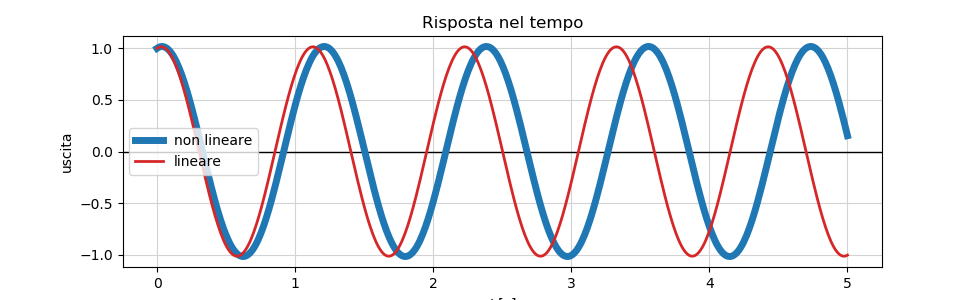

FloatSlider(value=0.3, continuous_update=False, description='$L$ [m]:', max=2.0, min=0.01, step=0.01)

FloatSlider(value=1.0, continuous_update=False, description='$\\theta_0$ [rad]:', max=3.0, min=-3.0)

FloatSlider(value=1.0, continuous_update=False, description='$\\dot \\theta_0$ [rad/s]:', max=3.0, min=-3.0)

Output()

In [5]:
# create figure
fig = plt.figure(figsize=(9.8, 3),num='Linearizzazione - Pendolo')

# add sublot
ax = fig.add_subplot(111)
ax.set_title('Risposta nel tempo')
ax.set_ylabel('uscita')
ax.set_xlabel('$t$ [s]')
ax.axhline(y=0, xmin=-1, xmax=6, color='k', linewidth=1)

ax.grid(which='both', axis='both', color='lightgray')

nonlinear, = ax.plot([], [])
linear, = ax.plot([], [])

style = {'description_width': 'initial'}

g=9.81 # m/s^2

def model_nonlinear(ic,t,L):
    fi, fidot = ic
    return [fidot,-g/L*np.sin(fi)]

def model_linear(ic,t,L):
    fi, fidot = ic
    return [fidot,-g/L*fi]

def build_model(y0,ypika0,L):
    ic=[y0,ypika0]
    t=np.linspace(0,5,num=500)
    fi=odeint(model_nonlinear,ic,t,args=(L,))
    ys=fi[:,0]

    fi_linear=odeint(model_linear,ic,t,args=(L,))
    ys_linear=fi_linear[:,0]
    
    global nonlinear, linear

    ax.lines.remove(nonlinear)
    ax.lines.remove(linear)
 
    nonlinear, = ax.plot(t,ys,label='non lineare',color='C0', linewidth=5)
    linear, = ax.plot(t,ys_linear,label='lineare',color='C3', linewidth=2)
    
    ax.legend()
    
    ax.relim()
    ax.autoscale_view()

L_slider=widgets.FloatSlider(value=0.3, min=.01, max=2., step=.01,
                                        description='$L$ [m]:',disabled=False,continuous_update=False,
                                        orientation='horizontal',readout=True,readout_format='.2f',)

ypika0_slider=widgets.FloatSlider(value=1, min=-3, max=3, step=0.1,
                                        description='$\dot \\theta_0$ [rad/s]:',disabled=False,continuous_update=False,
                                        orientation='horizontal',readout=True,readout_format='.2f',) 

y0_slider=widgets.FloatSlider(value=1, min=-3, max=3, step=0.1,
                                        description='$\\theta_0$ [rad]:',disabled=False,continuous_update=False,
                                        orientation='horizontal',readout=True,readout_format='.2f',) 

input_data=widgets.interactive_output(build_model, {'y0':y0_slider,'ypika0':ypika0_slider,'L':L_slider})

display(L_slider,y0_slider,ypika0_slider,input_data)